In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.applications import *
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
# Parameter setting
np.random.seed(2018)
model_name = 'Vgg16'
img_size = (224, 224)
batch_size = 32

In [3]:
# Data preparation
generator = ImageDataGenerator(preprocessing_function = vgg16.preprocess_input)

train_data_generator = generator.flow_from_directory('.\\imgs\\new_train',
                                                      target_size=img_size,
                                                      batch_size=batch_size,
                                                      shuffle=True,
                                                      class_mode='categorical')
valid_data_generator = generator.flow_from_directory('.\\imgs\\new_valid',
                                                      target_size=img_size,
                                                      batch_size=batch_size,
                                                      shuffle=True,
                                                      class_mode='categorical')
test_data_generator = generator.flow_from_directory('.\\imgs\\test',
                                                      target_size=img_size,
                                                      batch_size=batch_size,
                                                      shuffle=False,
                                                      class_mode=None)

Found 19972 images belonging to 10 classes.
Found 2452 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [4]:
# Construct model
from keras import backend as K
K.clear_session()

inputs = Input((*img_size, 3))
base_model = VGG16(input_tensor=inputs, weights='imagenet', include_top=False)
x = GlobalAveragePooling2D()(base_model.output)
#x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs, x)

print("total layer count {}".format(len(base_model.layers)))

total layer count 19


In [5]:
base_model.trainable = False
check_point = ModelCheckpoint(filepath='models//'+model_name+'base_model'+'.h', save_best_only=True)
    
model.compile(optimizer=RMSprop(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_data_generator, 
                    steps_per_epoch=len(train_data_generator),
                    epochs=5,
                    validation_data=valid_data_generator, 
                    validation_steps=len(valid_data_generator),
                    callbacks=[check_point])

Epoch 1/5
625/625 [==============================] - 424s 678ms/step - loss: 0.3619 - acc: 0.8984 - val_loss: 1.9877 - val_acc: 0.5632
Epoch 2/5
625/625 [==============================] - 372s 595ms/step - loss: 0.0239 - acc: 0.9932 - val_loss: 1.2206 - val_acc: 0.6464
Epoch 3/5
625/625 [==============================] - 372s 594ms/step - loss: 0.0110 - acc: 0.9973 - val_loss: 1.1384 - val_acc: 0.7202
Epoch 4/5
625/625 [==============================] - 371s 593ms/step - loss: 0.0062 - acc: 0.9986 - val_loss: 0.8239 - val_acc: 0.8030
Epoch 5/5
625/625 [==============================] - 370s 592ms/step - loss: 0.0044 - acc: 0.9985 - val_loss: 1.2647 - val_acc: 0.7520


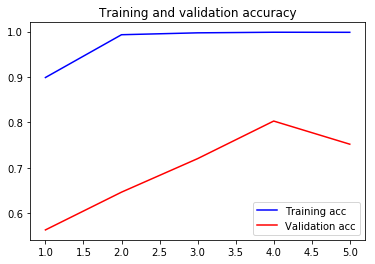

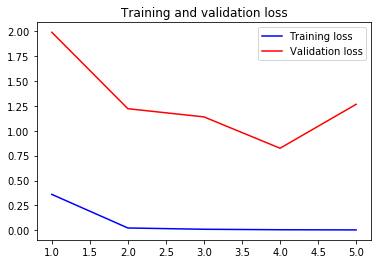

In [6]:
# Plot loss and accuracy of train set and validation set
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('C:\\Users\ERIC\Desktop\graduate project\\visualization\\vgg_acc_pic.jpg')

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('C:\\Users\ERIC\Desktop\graduate project\\visualization\\vgg_loss_pic.jpg')
plt.show()

In [7]:
# submition file
model = load_model('models//'+model_name+'base_model'+'.h')
df = pd.read_csv("submit_example.csv", index_col='img')
preds = model.predict_generator(test_data_generator, steps=len(test_data_generator), verbose=1)
for i, fname in enumerate(test_data_generator.filenames):
    index = fname[fname.rfind('\\')+1:]
    df.loc[index] = preds[i]

if not os.path.exists('submission'):
    os.mkdir('submission')

df.to_csv('submission\\'+model_name+'base_model'+'.csv', float_format='%.3f')

2492/2492 [==============================] - 555s 223ms/step
